# QUESTION 1

Je ne vais pas faire la normalisation de mes données car j'ai des données simples et il n'est pas necessaire de réduire la complexité des modèles. 

In [126]:
# On importe les données
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
# On supprime les colones qu'on n'utilise pas.

"""
    On efface ces colonnes car elles ne donnent aucune information utile. Par exemple,
    le nom du passager n'a aucune influence sur ses chances de survie.
"""
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Fare'],axis='columns',inplace=True)

In [132]:
data.Sex = data.Sex.map({'male': 0, 'female': 1})

In [133]:
data.stack().std()  

13.502796376911064

In [136]:
data.mean().mean()

8.186002756321383

# QUESTION 2

Je divise mes données dans chaque exercice. En effet, etant donnée qu'on travail avec des variables qui ont le meme nom dans chaque algorithme et que le modele d'algorithme change, il me semble que diviser les données a chaque reprise est plus securitaire. 

# QUESTION 3

<h1> Les arbres de décision</h1>


Pour faire une prédiction, les Les arbres de décision utilisent un ensemble de règles de décision « If Then Else » sur les données. Cette méthode permet de décomposer un ensemble de données en sous-ensembles de plus en plus petits. On peut ainsi assigner aux sous-ensemble finaux une classe (0 ou 1 pour une classification binaire). Le but du modèle va être de créer des sous-ensembles homogènes (contenant des exemples de même classe) pour minimiser l’erreur de ses prédictions.

##### CHARGEMENT DES LIBRAIRIES

In [15]:
import os #On importer le module os pour l'utiliser avec graphViz.
import pandas as pd #On importe pandas pour manipuler et analyser des données. 
from sklearn.model_selection import train_test_split
    #On importe train_test_split pour diviser nos dates en sous-ensembles de train et de test aléatoires.
from sklearn import tree #On exporte le classificateur d'arbre de décision.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    
from os import system
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
    ## On désigne le chemin vers l'exe de graphViz

##### CHARGEMENT DES DONNÉES EN MÉMOIRE

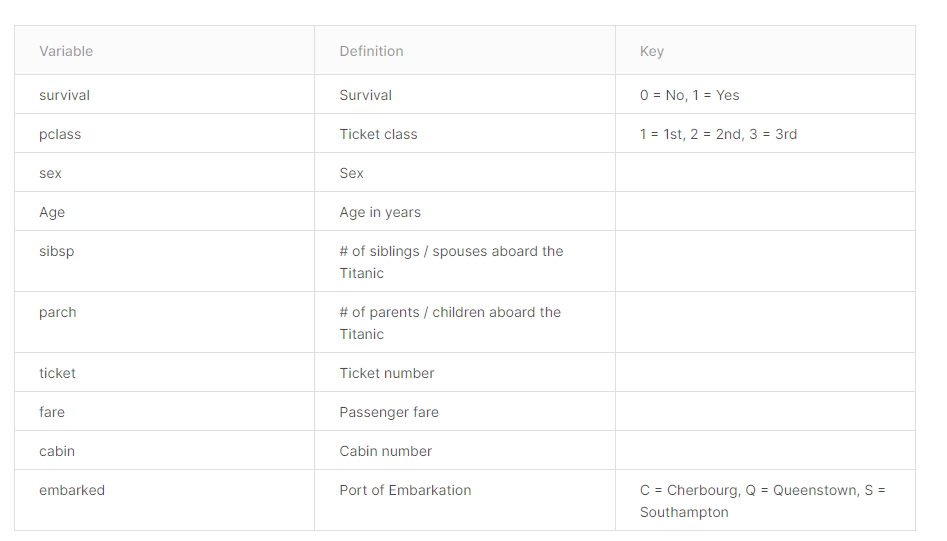

Pour le travail final, je vais utiliser la base de données titanic.csv

In [16]:
# On importe les données
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### L'analyse exploratoire des données

On peut mentionner que les données sont brutes car les données n'ont pas été préparées spécifiquement pour des tâches de machine learning. Pour bien faire le travail, je vais m’appuyer sur le schéma suivant pour bien faire mon prétraiter des données

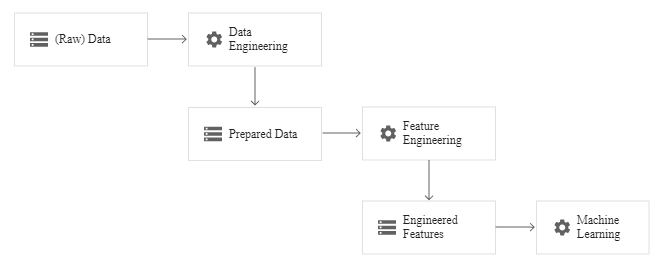

Lien: https://cloud.google.com/architecture/data-preprocessing-for-ml-with-tf-transform-pt1?hl=fr

In [17]:
data.shape # La méthode shape() permet de connaître le structure de notre DataFrame
           # on a 891 lignes et 12 colonnes.

(891, 12)

Plusieurs colonnes dans notre DataFrame ne vont pas servir et je vais les effacer

In [18]:
# On supprime les colones qu'on n'utilise pas.

"""
    On efface ces colonnes car elles ne donnent aucune information utile. Par exemple,
    le nom du passager n'a aucune influence sur ses chances de survie.
"""
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Fare'],axis='columns',inplace=True)

In [19]:
data.info()

    # On a 891 données dans chaque colonne (Sauf age).
    # Toutes les colonnes sont de type objet.
    # On a de nulls dans la colonne "age".

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [20]:
# On voit qu'il manque 177 données pour la colonne age.

data.isnull().sum() 

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [21]:
# Étant donné que j'ai une petite base de données, je ne veux pas supprimer les lignes ou il manque l'age.
# Ainsi, je vais remplacer les nuls de la colonne age par la moyenne de la colonne
data.Age = data.Age.fillna(data.Age.mean())

In [22]:
# On n'a plus de données qui manque
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [23]:
data.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [24]:
# On va remplacer les hommes par le chiffre 0 et les femmes par le chiffre 1

data.Sex = data.Sex.map({'male': 0, 'female': 1})

In [25]:
data.head()

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [26]:
# Separation de notre base de données
Q1 = data.drop('Survived',axis='columns')
y = data.Survived
Q1.head()

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [27]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

<h3>Construire le modèle d'arbre de décision</h3>


In [28]:
# Un modèle de Machine Learning a besoin de s’entraîner pour apprendre. Et il est important qu’on puisse 
# évaluer si le modèle a bien appris ou pas, s’il est efficace ou pas. 
# On, va donc séparer le dataset en deux parties avec d’un côté 80% des passagers qui vont servir d’exemples
# envoyés au modèle pour qu’il apprenne (on appellera ce premier tableau X_train), et de l’autre 20% des passagers
# qui vont permettre d’évaluer la fiabilité du modèle (appelé  X_test). 

# Pour le second groupe de passagers, on donnera au modèle toutes leurs caractéristiques hormis 
# l’information de leur survie, et on comparera la prédiction du modèle avec la réalité.

# On insère le code ci-dessous pour séparer les données du dataset initial en train (dataset d’entraînement) 
# et test (dataset pour vérifier que le modèle créé est efficace).

# Dans notre cas, on utilise la metrique gini pour le decoupage. 

"""
    D’ailleurs, on voit qu’il est possible de changer la taille du testset en modifiant le code. 
    Ici on choisit  0,20 (ce qui veut dire que le nombre de passagers composant le test représente
    20% du total des passagers). Un modèle à qui on donne beaucoup d’exemples est mieux
    entraîné, mais il faut conserver un testset assez conséquent pour correctement mesurer l’efficacité.
"""

"""
    Entraîner un modèle c’est donner assez d’exemples à l’algorithme pour qu’il trouve tout seul des règles 
    de classification, sans qu’on ait besoin de les expliciter. 
"""

X_train, X_test, y_train, y_test = train_test_split(Q1,y,test_size=0.20)
modelTree = tree.DecisionTreeClassifier(random_state=0, criterion='gini',max_depth=5 )
    #On commence par importer les bons modules et construire l’objet arbre
modelTree.fit(X_train,y_train)
    #L’arbre se construit à l’aide de la méthode .fit(X, y) 
accuracyTreeReel = modelTree.score(X_test,y_test) # Précision Arbre x_test
accuracyTreeTrain = modelTree.score(X_train,y_train) # Précision Arbre x_train

"""
    On doit vérifier la fiabilité du modèle. Globalement, il y a deux problèmes qui peuvent survenir :
    
    1)Soit le modèle ne dispose pas d’assez d’exemples / d’informations et il a du mal à trouver une 
      « logique » pour classer les passagers entre eux
      
    2)Soit le modèle a appris « par coeur », ce qui veut dire qu’il classe parfaitement tous les passagers 
    du train set qu’on lui a donné en exemple, mais si on lui donne un nouveau passager qu’il ne connaît pas, 
    il risque de se tromper car il n’a pas compris la logique de l'algorithme.
"""

# Comme on peut le voir, les scores sont très proches, ce qui indique que nous avons
# évité le surentraînement. 

print('Précision Arbre x_test: ', accuracyTreeReel)
print('Précision Arbre x_train: ', accuracyTreeTrain)

Précision Arbre x_test:  0.8212290502793296
Précision Arbre x_train:  0.8174157303370787


On génére une image de notre arbre

In [29]:
# Une fois l’apprentissage terminé, nous pouvons visualiser l’arbre, soit avec matplotlib en passant par 
# la méthode plot_tree, soit avec l’outil graphviz (commande dot). 

# On va exporter notre arbre dans le format png.
# Ainsi, on peut mieux le visualiser grace a l'option de zoom
dotfile = open("test.dot", 'w')
tree.export_graphviz(modelTree, out_file=dotfile, 
                      feature_names=['Pclass','Genre','Age'],  
                      class_names =['Mort','Vivant'],
                      filled=True, rounded=True,  
                      special_characters=True)  

dotfile.close()
system("dot -Tpng test.dot -o ex1.png")

0

<img src='dtree2. png'>

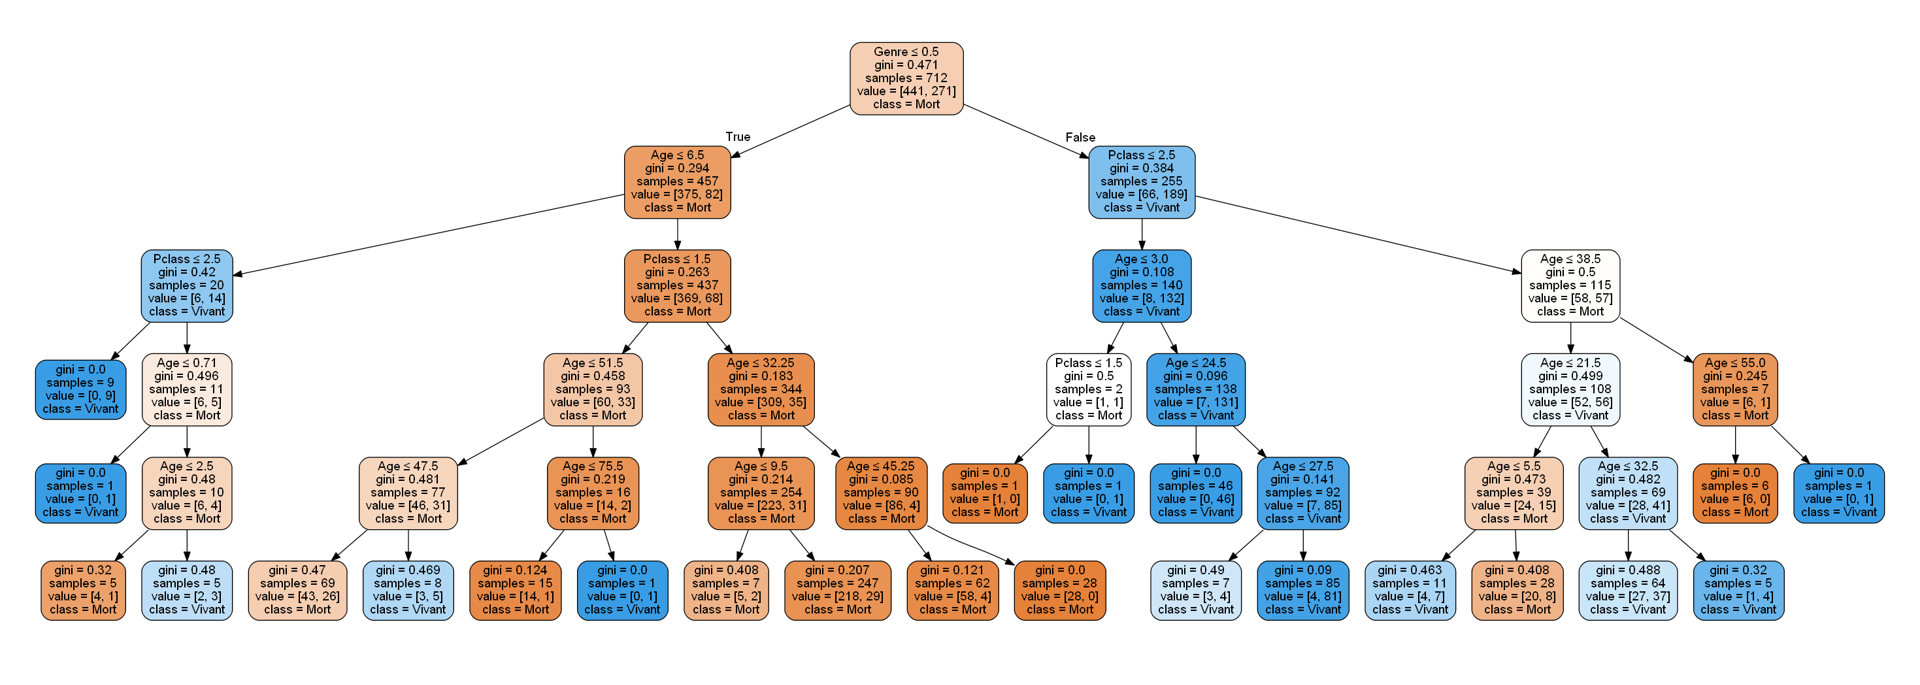

In [30]:
# On peut vusualiser egalement notre arbre de cette facon (moins comprehensible)
text_representation = tree.export_text(modelTree)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_2 <= 13.00
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  2.50
|   |   |   |--- feature_2 <= 0.71
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.71
|   |   |   |   |--- feature_2 <= 11.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  11.50
|   |   |   |   |   |--- class: 1
|   |--- feature_2 >  13.00
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_2 <= 60.50
|   |   |   |   |--- feature_2 <= 47.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  47.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  60.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  1.50
|   |   |   |--- feature_2 <= 32.25
|   |   |   |   |--- feature_2 <= 31.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  31.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  32.25
|   |   |   |   |--- feature_2 <= 61.50
|   |   |   |

In [32]:
pred = modelTree.predict(X_test)

In [33]:
# On va creer la matrice de confusion
matrix = pd.DataFrame(
        confusion_matrix(y_test, pred),
        columns=['Prédit 0', 'Prédit 1'],
        index=['Realité 0', 'Realité 1'])
matrix

,Prédit 0,Prédit 1
Realité 0,97,12
Realité 1,20,50


In [38]:
# Pour m'assurer que j'ai bien mis mes infos dans la premiere matrice
print(confusion_matrix(y_test, pred))

[[97 12]
 [20 50]]


99+11+23+46: 179 données (notrey_test)

La matrice de confusion
* Vrai positif (TP) = 97 ; ce qui signifie que 97 points de données de classe positifs ont été correctement classés par le modèle

* Vrai négatif (VN) = 50 ; ce qui signifie que 50 points de données de classe négative ont été correctement classés par le modèle

* Faux positif (FP) = 12 ; ce qui signifie que 12 points de données de classe négative ont été classés à tort comme appartenant à la classe positive par le modèle

* Faux négatif (FN) = 20 ; ce qui signifie que 20 points de données de classe positive ont été classés à tort comme appartenant à la classe négative par le modèle


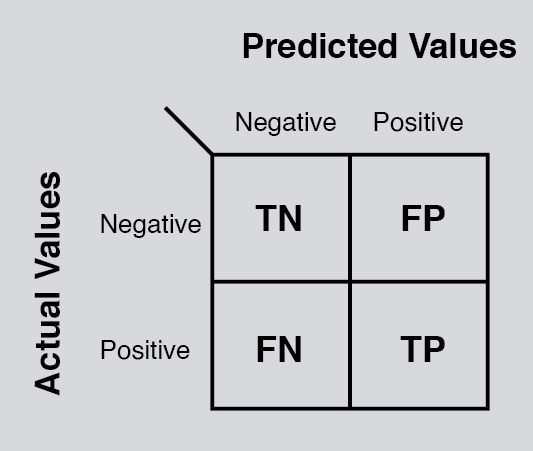

In [34]:
from sklearn import metrics
import numpy as np
y_pred=np.around(modelTree.predict(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       109
           1       0.81      0.71      0.76        70

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



* La précision nous dit combien de cas correctement prédits se sont avérés positifs.
* Le rappel nous indique combien de cas positifs réels nous avons pu prédire correctement avec notre modèle.

    1. 83% des cas prédits (le passager est décédé) se sont avérés être vrais. Alors que 89% de passagers décédés ont été prédits avec succès par le modèle.
    1. 81% des cas prédits (le passager est vivant) se sont avérés être vrais. Alors que 71% de passagers vivants ont été prédits avec succès par le modèle.
    
* Le score F1 est une moyenne harmonique de Precision et Recall , et il donne donc une idée combinée de ces deux métriques. Il est maximum lorsque la Précision est égale à Rappel.Mais il y a un hic ici. L'interprétabilité du score F1 est médiocre. Cela signifie que nous ne savons pas ce que notre classificateur maximise – précision ou rappel ? Nous l'utilisons donc en combinaison avec d'autres mesures d'évaluation, ce qui nous donne une image complète du résultat.
    

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
print (fpr)
print (tpr)

'''
Precision = TP/(TP+FP)

Recall = TP/(TP+FN)  
'''


# Le taux de faux négatifs (FNR) nous indique quelle proportion de la classe positive a été mal classée par le classificateur.
# Dans notre cas, une proportion de 11% de personnes qui ont survecu ont été 
# mal détectées par le modele.

#TPR (True Positive Rate, également connu sous le nom de Recall): une proportion de 71.4% de personnes qui ont survecu ont été 
# correctement détectées par le modele.

[0.         0.11009174 1.        ]
[0.         0.71428571 1.        ]


In [40]:
roc_auc = metrics.auc(fpr, tpr)

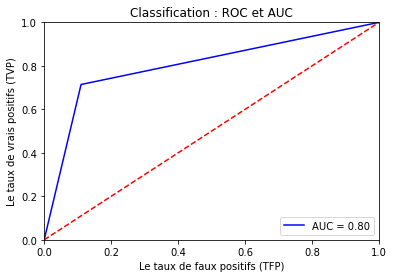

In [41]:
import matplotlib.pyplot as plt
plt.title('Classification : ROC et AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Le taux de vrais positifs (TVP)')
plt.xlabel('Le taux de faux positifs (TFP)')
plt.show()

La courbe AUC - ROC est une mesure de performance pour les problèmes de classification à divers réglages de seuil. ROC est une courbe de probabilité et AUC représente le degré ou la mesure de séparabilité. Il indique dans quelle mesure le modèle est capable de distinguer les classes. Plus l'AUC est élevée, mieux le modèle prédit 0 classes comme 0 et 1 classes comme 1. L' AUC de notre modele est de 0.80, donc il y a de fortes chances que le classificateur soit capable de distinguer les valeurs de classe positives des valeurs de classe négatives. C'est parce que le classificateur est capable de détecter plus de nombres de vrais positifs et de vrais négatifs que de faux négatifs et de faux positifs.

# Random Forest

Random Forest est un algorithme d'apprentissage supervisé. Comme vous pouvez déjà le voir d'après son nom, cela crée une forêt et la rend en quelque sorte aléatoire. Pour le dire en termes simples : la forêt aléatoire crée plusieurs arbres de décision et les fusionne pour obtenir une prédiction plus précise et plus stable.

Il s'agit donc de construire plusieurs arbres de décision, de 2 à l'infinité (selon le souhait de l'utilisateur), et de tous les entraîner, pour finir par prendre la décision que tous ou du moins que la majorité considérera comme la meilleure. 

In [42]:
#Importer les librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [43]:
acc_scorer = make_scorer(accuracy_score)

In [44]:
# Afficher le dataset
q2 = pd.read_csv("titanic.csv")
q2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
q2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
# Encore une fois, il nous manque de données dans le colonne age.
# On va mettre la moyenne aux espaces ou il manque de données dans la colonne "Age"
# Egalement, on va convertir la colonne age en integer
q2.dropna(subset=['Age'],inplace=True)
#q2.Age = q2.Age.fillna(q2.Age.mean())
q2.Age = q2.Age.astype(int)
q2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [47]:
# Transformation de la variable Sex en bin
q2.Sex = q2.Sex.map({'male': 0, 'female': 1})

In [48]:
q2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [49]:
# Plusieurs colonnes ne servent a rien, donc on va les effacer
q2.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns',inplace=True)

In [50]:
q2.describe()

# Environ 40% ont survecu et 60% sont morts

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.679272,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.536483,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


l'idée derrière le Random Forest est qu'en entraînant plusieurs arbres de décision plutôt qu'un seul, ayant tous une expérience différente le groupe d'arbres de décision sera bien plus à même de prendre une meilleure décision pour résoudre le problème que si ce n'était qu'un seul arbre de décision qui avait été entraîné.

En clair, plus l'on augmente le nombre d'arbres présents dans la forêt d'arbres décisionnels et plus il y a de chance que cette dernière converge vers la solution optimale du problème que l'on cherche à résoudre. 

Verifions quelle influence peut avoir differents caracteristiques sur la survie de passagers

##### Influence de l'âge sur la survie

Text(0, 0.5, '%Survie')

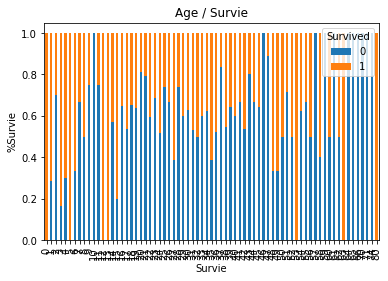

In [51]:
# Influence de l'âge sur la survie
import matplotlib.pyplot as plt
table= pd.crosstab(q2.Age,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Age / Survie')
plt.xlabel('Survie')
plt.ylabel('%Survie')

On a trop de données dans la categorie age, donc on va les mettre en categories

In [52]:
q2['AgeBand'] = pd.cut(q2['Age'], 5)
q2[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.370690
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [53]:
q2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,22,1,0,7.2500,S,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,"(32.0, 48.0]"


In [54]:
q2.loc[ q2['Age'] <= 16, 'Age'] = 0
q2.loc[(q2['Age'] > 16) & (q2['Age'] <= 32), 'Age'] = 1
q2.loc[(q2['Age'] > 32) & (q2['Age'] <= 48), 'Age'] = 2
q2.loc[(q2['Age'] > 48) & (q2['Age'] <= 64), 'Age'] = 3
q2.loc[ q2['Age'] > 64, 'Age'] =4
q2.drop(['AgeBand'],axis=1,inplace=True)

In [55]:
q2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.2500,S
1,1,1,1,2,1,0,71.2833,C
2,1,3,1,1,0,0,7.9250,S
3,1,1,1,2,1,0,53.1000,S
4,0,3,0,2,0,0,8.0500,S


Text(0, 0.5, '%Survie')

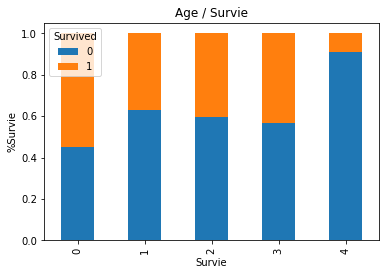

In [56]:
#Age
table= pd.crosstab(q2.Age,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Age / Survie')
plt.xlabel('Survie')
plt.ylabel('%Survie')

##### Influence du sexe sur la survie

Text(0, 0.5, '')

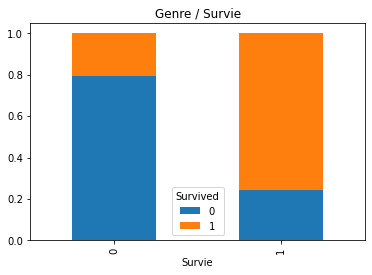

In [57]:
# Sexe
table= pd.crosstab(q2.Sex,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Genre / Survie')
plt.xlabel('Survie')
plt.ylabel('')

##### Influence de la classe (billet) sur la survie

Text(0, 0.5, '')

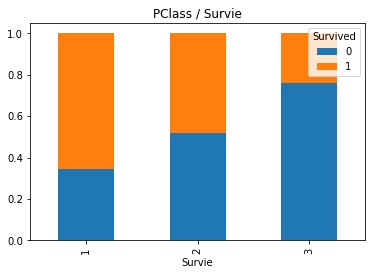

In [58]:
table= pd.crosstab(q2.Pclass,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('PClass / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

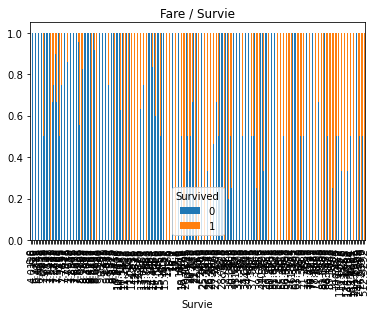

In [59]:
table= pd.crosstab(q2.Fare,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fare / Survie')
plt.xlabel('Survie')
plt.ylabel('')

In [60]:
q2['FareGroup'] = pd.qcut(q2['Fare'],3)
q2[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)

,FareGroup,Survived
0,"(-0.001, 10.462]",0.196653
1,"(10.462, 26.55]",0.460581
2,"(26.55, 512.329]",0.564103


In [61]:
q2.loc[ q2['Fare'] <= 10.462, 'Fare'] = 0
q2.loc[(q2['Fare'] > 10.462) & (q2['Fare'] <= 26.55), 'Fare'] = 1
q2.loc[ q2['Fare'] > 26.55, 'Fare'] = 2
q2['Fare'] = q2['Fare'].astype(int)

q2.drop(['FareGroup'], axis=1,inplace=True)

Text(0, 0.5, '')

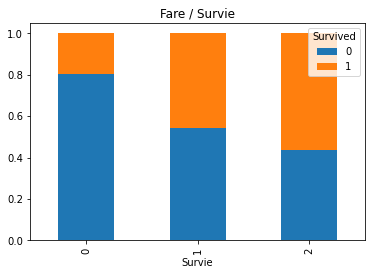

In [62]:
table= pd.crosstab(q2.Fare,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fare / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

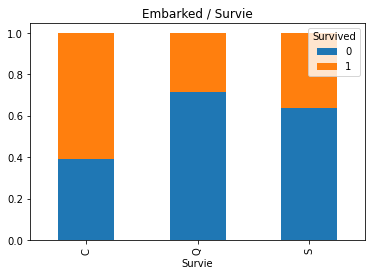

In [63]:
table= pd.crosstab(q2.Embarked,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Embarked / Survie')
plt.xlabel('Survie')
plt.ylabel('')

# La place ou on a embarqué n'a pas d'impact sur notre survie 

Text(0, 0.5, '')

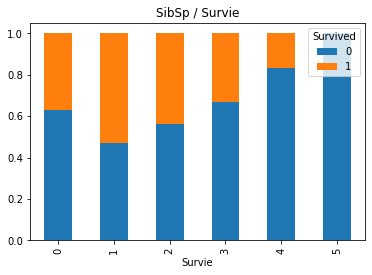

In [64]:
# Structure de la famille
table= pd.crosstab(q2.SibSp,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('SibSp / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

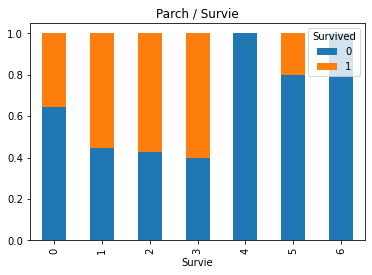

In [65]:
# Enfants
table= pd.crosstab(q2.Parch,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Parch / Survie')
plt.xlabel('Survie')
plt.ylabel('')

In [66]:
q2['FamilySize'] = q2['SibSp'] + q2['Parch'] + 1

Text(0, 0.5, '')

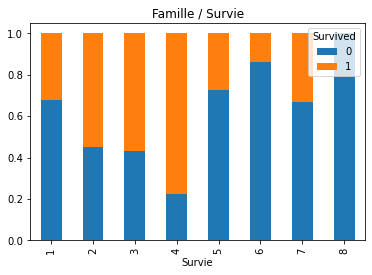

In [67]:
table= pd.crosstab(q2.FamilySize,q2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Famille / Survie')
plt.xlabel('Survie')
plt.ylabel('')

In [68]:
# tri
q2.drop(['SibSp','Parch'],axis='columns',inplace=True)

In [69]:
#Separation
Features = q2.drop('Survived',axis='columns')
y = q2.Survived
Features.head()
Features.shape

(714, 6)

In [70]:
Features.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,1,0,S,2
1,1,1,2,2,C,2
2,3,1,1,0,S,1
3,1,1,2,2,S,2
4,3,0,2,0,S,1


In [71]:
# Ajustement des features
Features.tail()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
885,3,1,2,2,Q,6
886,2,0,1,1,S,1
887,1,1,1,2,S,1
889,1,0,1,2,C,1
890,3,0,1,0,Q,1


In [72]:
# Correlation positive
Features.drop(['Embarked','Pclass'],axis=1,inplace=True)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(Features, y, test_size=0.3, random_state=0)

In [75]:
# Avec entropy
random_forest = RandomForestClassifier()

parameters = {'n_estimators': [3,4,5,10,15,20,25,30,35,40,45],'criterion': ['entropy'], 'max_depth': [2, 3, 5, 10]}
# n_estimatorsc'est le nombre d'arbres à utiliser dans la forêt. Étant donné que Random Forest est une méthode 
# d'ensemble comprenant la création de plusieurs arbres de décision, ce paramètre est utilisé pour contrôler 
# le nombre d'arbres à utiliser dans le processus. Dans notre cas, le modele, va choisir le meilleur estimateur.

grid_obj = GridSearchCV(random_forest, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
print(grid_obj.best_estimator_)


clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=35)
0.8356713426853707
0.8046511627906977


In [74]:
# Avec entropy
random_forest = RandomForestClassifier()

parameters = {'n_estimators': [3,4,5,10,15,20,25,30,35,40,45],'criterion': ['entropy'], 'max_depth': [2, 3, 5, 10]}
# n_estimatorsc'est le nombre d'arbres à utiliser dans la forêt. Étant donné que Random Forest est une méthode 
# d'ensemble comprenant la création de plusieurs arbres de décision, ce paramètre est utilisé pour contrôler 
# le nombre d'arbres à utiliser dans le processus. Dans notre cas, le modele, va choisir le meilleur estimateur.

grid_obj = GridSearchCV(random_forest, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
print(grid_obj.best_estimator_)


clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=4)
0.8256513026052105
0.8186046511627907


In [77]:
pred = clf.predict(X_test)

In [78]:
# On va creer la matrice de confusion
matrix = pd.DataFrame(
        confusion_matrix(y_test, pred),
        columns=['Predicted 0', 'Predicted 1'],
        index=['Actual 0', 'Actual 1'])
matrix

,Predicted 0,Predicted 1
Actual 0,113,12
Actual 1,32,58


La matrice de confusion
* Vrai positif (TP) = 113 ce qui signifie que 113 points de données de classe positifs ont été correctement classés par le modèle

* Vrai négatif (VN) = 58 ; ce qui signifie que 58 points de données de classe négative ont été correctement classés par le modèle

* Faux positif (FP) = 12 ; ce qui signifie que 12 points de données de classe négative ont été classés à tort comme appartenant à la classe positive par le modèle

* Faux négatif (FN) = 32 ; ce qui signifie que 32 points de données de classe positive ont été classés à tort comme appartenant à la classe négative par le modèle


In [79]:
# On mesurer la précision du modèle
acc = accuracy_score(y_test, pred)
acc

0.7953488372093023

In [82]:
# On va créer un rapport de classement
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       125
           1       0.83      0.64      0.73        90

    accuracy                           0.80       215
   macro avg       0.80      0.77      0.78       215
weighted avg       0.80      0.80      0.79       215



* La précision nous dit combien de cas correctement prédits se sont avérés positifs.
* Le rappel nous indique combien de cas positifs réels nous avons pu prédire correctement avec notre modèle.

    1. 78% des cas prédits (le passager est décédé) se sont avérés être vrais. Alors que 90% de passagers décédés ont été prédits avec succès par le modèle.
    1. 83% des cas prédits (le passager est vivant) se sont avérés être vrais. Alors que 64% de passagers vivants ont été prédits avec succès par le modèle.

In [86]:
'''
Precision = TP/(TP+FP)

Recall = TP/(TP+FN)  
'''

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, pred)
print (fpr)
print (tpr)

# Le taux de faux négatifs (FNR) nous indique quelle proportion de la classe positive a été mal classée par le classificateur.
# Dans notre cas, une proportion de 9% de personnes qui ont survecu ont été 
# mal détectées par le modele.

#TPR (True Positive Rate, également connu sous le nom de Recall): une proportion de 64.4% de personnes qui ont survecu ont été 
# correctement détectées par le modele.

[0.    0.096 1.   ]
[0.         0.64444444 1.        ]


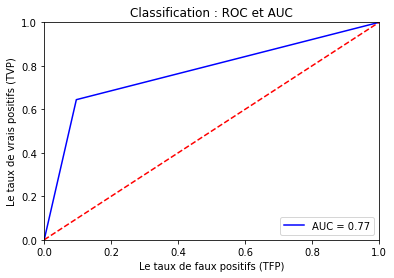

In [88]:
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Classification : ROC et AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Le taux de vrais positifs (TVP)')
plt.xlabel('Le taux de faux positifs (TFP)')
plt.show()

La courbe AUC - ROC est une mesure de performance pour les problèmes de classification à divers réglages de seuil. ROC est une courbe de probabilité et AUC représente 
le degré ou la mesure de séparabilité. Il indique dans quelle mesure le modèle est capable de distinguer les classes. Plus l'AUC est élevée, mieux le modèle prédit 0 
classes comme 0 et 1 classes comme 1. L' AUC de notre modele est de 0.77, donc il y a de fortes chances que le classificateur soit capable de distinguer les valeurs de 
classe positives des valeurs de classe négatives. C'est parce que le classificateur est capable de détecter plus de nombres de vrais positifs et de vrais négatifs que 
de faux négatifs et de faux positifs.

# Classification bayésienne naïve

In [89]:
# On importe les libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set()
%matplotlib inline

In [90]:
# Afficher le dataset
q3 = pd.read_csv("titanic.csv")
q3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
# Voir notre database
q3.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Nysveen, Mr. Johan Hansen",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Comme on a deja vu avec cette database, certaines colonnes ne sont pas utiles et on avait la colonne age avec des valeurs manquantes. On va nettoyer notre database

In [92]:
# On efface les colonnes qu'on n'utilise pas
data = q3.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns')
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [93]:
# On a 177 valeurs manquantes
x = data.isnull().sum()
x

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [94]:
# Dans ce cas, on va effacer les valeurs manquantes
# On voit qu'on a 714 valeurs partout
x = data.dropna(axis=0)
x.describe(include='all')

,Survived,Pclass,Sex,Age,Fare
count,714.000000,714.000000,714,714.000000,714.000000
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,male,NaN,NaN
freq,NaN,NaN,453,NaN,NaN
mean,0.406162,2.236695,NaN,29.699118,34.694514
std,0.491460,0.838250,NaN,14.526497,52.918930
min,0.000000,1.000000,NaN,0.420000,0.000000
25%,0.000000,1.000000,NaN,20.125000,8.050000
50%,0.000000,2.000000,NaN,28.000000,15.741700
75%,1.000000,3.000000,NaN,38.000000,33.375000


In [95]:
# On utilise la methode de pandas get_dummies() pour convertir les données catégorielles en idicatrice
x = pd.get_dummies(x, drop_first=True)
x.head()

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


On va verifier les relations linéaires entre nos colonnes avec la matrice de corrélation

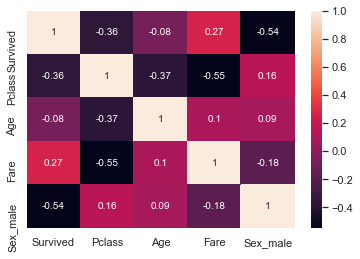

In [96]:
corr_matrix = x.corr().round(2)  
sns.heatmap(data=corr_matrix, annot=True)  
plt.show()

In [97]:
# A partir de la matrice de corrélation, on peut voir que la colonne 'Pclass' et 'Fare' ont une corrélation de -0,55. 
# Donc, on peut penser que leurs caractéristiques sont fortement corrélées les unes aux autres. 
# Compte tenu de la multicolinéarité, on va effacer la colonne Fare car elle a une corrélation 
# plus faible avec Survived que Pclass.

x = x.drop('Fare', axis=1)
x.head()

,Survived,Pclass,Age,Sex_male
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1


C:\Users\Ilyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


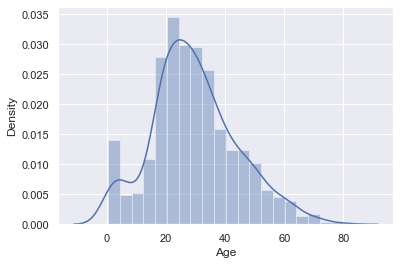

In [98]:
# Étant donné que la colonne Âge a des valeurs numériques, nous pouvons tracer sa distribution.
sns.distplot(x['Age'])
plt.show()

il semble que Age a une distribution proche de la gaussienne. On peut appliquer le modèle gaussien naïf de Bayes

In [99]:
# On declare les caractéristiques et le label
car = x.drop('Survived', axis=1)
lab = x['Survived']

In [100]:
# On divise notre database 20:80
X_train, X_test, y_train, y_test = train_test_split(car, lab, test_size=0.2, random_state=1)

In [101]:
# On construit le modele
classificateur = GaussianNB()
classificateur.fit(X_train, y_train)

GaussianNB()

In [102]:
# La prediction
pred = classificateur.predict(X_test)

In [103]:
# On mesurer la précision du modèle
acc = accuracy_score(y_test, pred)
acc

0.7692307692307693

In [104]:
# On va creer la matrice de confusion
matrix = pd.DataFrame(
        confusion_matrix(y_test, pred),
        columns=['Predicted 0', 'Predicted 1'],
        index=['Actual 0', 'Actual 1'])
matrix

,Predicted 0,Predicted 1
Actual 0,74,12
Actual 1,21,36


La matrice de confusion
* Vrai positif (TP) = 74 ; ce qui signifie que 74 points de données de classe positifs ont été correctement classés par le modèle

* Vrai négatif (VN) = 36 ; ce qui signifie que 36 points de données de classe négative ont été correctement classés par le modèle

* Faux positif (FP) = 12 ; ce qui signifie que 12 points de données de classe négative ont été classés à tort comme appartenant à la classe positive par le modèle

* Faux négatif (FN) = 21 ; ce qui signifie que 21 points de données de classe positive ont été classés à tort comme appartenant à la classe négative par le modèle


In [105]:
# On va créer un rapport de classement
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        86
           1       0.75      0.63      0.69        57

    accuracy                           0.77       143
   macro avg       0.76      0.75      0.75       143
weighted avg       0.77      0.77      0.77       143



In [106]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, pred)
print (fpr)
print (tpr)

[0.         0.13953488 1.        ]
[0.         0.63157895 1.        ]


In [108]:
# Le taux de faux négatifs (FNR) nous indique quelle proportion de la classe positive a été mal classée par le classificateur.
# Dans notre cas, une proportion de 13.9% de personnes qui ont survecu ont été 
# mal détectées par le modele.

#TPR (True Positive Rate, également connu sous le nom de Recall): une proportion de 63.1% de personnes qui ont survecu ont été 
# correctement détectées par le modele.

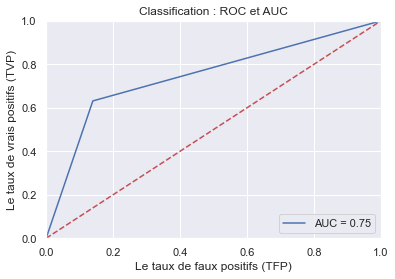

In [107]:
roc_auc = metrics.auc(fpr, tpr)
plt.title('Classification : ROC et AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Le taux de vrais positifs (TVP)')
plt.xlabel('Le taux de faux positifs (TFP)')
plt.show()

La courbe AUC - ROC est une mesure de performance pour les problèmes de classification à divers réglages de seuil. ROC est une courbe de probabilité et AUC représente 
le degré ou la mesure de séparabilité. Il indique dans quelle mesure le modèle est capable de distinguer les classes. Plus l'AUC est élevée, mieux le modèle prédit 0 
classes comme 0 et 1 classes comme 1. L' AUC de notre modele est de 0.75%, donc il y a de fortes chances que le classificateur soit capable de distinguer les valeurs de 
classe positives des valeurs de classe négatives. C'est parce que le classificateur est capable de détecter plus de nombres de vrais positifs et de vrais négatifs que 
de faux négatifs et de faux positifs.

# Bagging

In [109]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap


bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, oob_score=False, bootstrap=True, random_state=42)
bag_clf = bag_clf.fit(X_train, y_train)

In [110]:
Y_pred_bag_clf = bag_clf.predict(X_test)

In [117]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, Y_pred_bag_clf)
print (fpr) # taux de faux positifs (FPR)
print (tpr) # taux de vrais positifs (TPR)

[0.         0.08139535 1.        ]
[0.         0.75438596 1.        ]


Le taux de faux négatifs (FNR) nous indique quelle proportion de la classe positive a été mal classée par le classificateur.
Dans notre cas, une proportion de 8% de personnes qui ont survecu ont été 
mal détectées par le modele.

TPR (True Positive Rate, également connu sous le nom de Recall): une proportion de 75% de personnes qui ont survecu ont été 
correctement détectées par le modele.

In [112]:
# On mesurer la précision du modèle
acc = accuracy_score(y_test, Y_pred_bag_clf)
acc

0.8531468531468531

In [113]:
# On va creer la matrice de confusion
matrix = pd.DataFrame(
        confusion_matrix(y_test, Y_pred_bag_clf),
        columns=['Predicted 0', 'Predicted 1'],
        index=['Actual 0', 'Actual 1'])
matrix

,Predicted 0,Predicted 1
Actual 0,79,7
Actual 1,14,43


La matrice de confusion
* Vrai positif (TP) = 79 ; ce qui signifie que 79 points de données de classe positifs ont été correctement classés par le modèle

* Vrai négatif (VN) = 43 ; ce qui signifie que 43 points de données de classe négative ont été correctement classés par le modèle

* Faux positif (FP) = 7 ; ce qui signifie que 7 points de données de classe négative ont été classés à tort comme appartenant à la classe positive par le modèle

* Faux négatif (FN) = 14 ; ce qui signifie que 14 points de données de classe positive ont été classés à tort comme appartenant à la classe négative par le modèle

In [114]:
# On va créer un rapport de classement
print(classification_report(y_test,Y_pred_bag_clf))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        86
           1       0.86      0.75      0.80        57

    accuracy                           0.85       143
   macro avg       0.85      0.84      0.84       143
weighted avg       0.85      0.85      0.85       143



* La précision nous dit combien de cas correctement prédits se sont avérés positifs.
* Le rappel nous indique combien de cas positifs réels nous avons pu prédire correctement avec notre modèle.

    1. 85% des cas prédits (le passager est décédé) se sont avérés être vrais. Alors que 92% de passagers décédés ont été prédits avec succès par le modèle.
    1. 86% des cas prédits (le passager est vivant) se sont avérés être vrais. Alors que 75% de passagers vivants ont été prédits avec succès par le modèle.
    

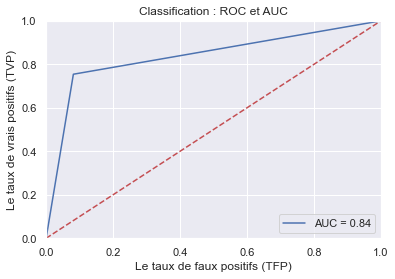

In [116]:
roc_auc = metrics.auc(fpr, tpr)
plt.title('Classification : ROC et AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Le taux de vrais positifs (TVP)')
plt.xlabel('Le taux de faux positifs (TFP)')
plt.show()

La courbe AUC - ROC est une mesure de performance pour les problèmes de classification à divers réglages de seuil. ROC est une courbe de probabilité et AUC représente 
le degré ou la mesure de séparabilité. Il indique dans quelle mesure le modèle est capable de distinguer les classes. Plus l'AUC est élevée, mieux le modèle prédit 0 
classes comme 0 et 1 classes comme 1. L' AUC de notre modele est de 0.84, donc il y a de fortes chances que le classificateur soit capable de distinguer les valeurs de 
classe positives des valeurs de classe négatives. C'est parce que le classificateur est capable de détecter plus de nombres de vrais positifs et de vrais négatifs que 
de faux négatifs et de faux positifs.

# AdaBoost

In [118]:
from sklearn.ensemble import AdaBoostClassifier #utilisé pour instancier le Adaboost
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(X_train, y_train)
Y_train_abc = model.predict(X_train)

In [119]:
#Predict the response for test dataset
Y_pred_abc = model.predict(X_test)

In [120]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, Y_pred_abc)
print (fpr)
print (tpr)

[0.         0.19767442 1.        ]
[0.         0.78947368 1.        ]


In [121]:
# On mesurer la précision du modèle
acc = accuracy_score(y_test, Y_pred_abc)
acc

0.7972027972027972

In [122]:
# On va creer la matrice de confusion
matrix = pd.DataFrame(
        confusion_matrix(y_test, Y_pred_abc),
        columns=['Predicted 0', 'Predicted 1'],
        index=['Actual 0', 'Actual 1'])
matrix

,Predicted 0,Predicted 1
Actual 0,69,17
Actual 1,12,45


La matrice de confusion
* Vrai positif (TP) = 69 ; ce qui signifie que 69 points de données de classe positifs ont été correctement classés par le modèle

* Vrai négatif (VN) = 45 ; ce qui signifie que 45 points de données de classe négative ont été correctement classés par le modèle

* Faux positif (FP) = 17 ; ce qui signifie que 17 points de données de classe négative ont été classés à tort comme appartenant à la classe positive par le modèle

* Faux négatif (FN) = 12 ; ce qui signifie que 12 points de données de classe positive ont été classés à tort comme appartenant à la classe négative par le modèle


In [123]:
# On va créer un rapport de classement
print(classification_report(y_test,Y_pred_bag_clf))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        86
           1       0.86      0.75      0.80        57

    accuracy                           0.85       143
   macro avg       0.85      0.84      0.84       143
weighted avg       0.85      0.85      0.85       143



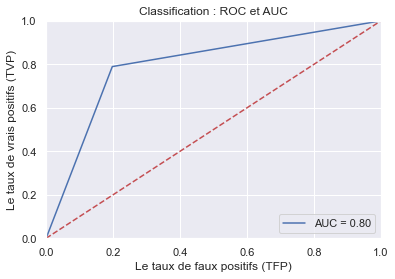

In [124]:
roc_auc = metrics.auc(fpr, tpr)
plt.title('Classification : ROC et AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Le taux de vrais positifs (TVP)')
plt.xlabel('Le taux de faux positifs (TFP)')
plt.show()

La courbe AUC - ROC est une mesure de performance pour les problèmes de classification à divers réglages de seuil. ROC est une courbe de probabilité et AUC représente 
le degré ou la mesure de séparabilité. Il indique dans quelle mesure le modèle est capable de distinguer les classes. Plus l'AUC est élevée, mieux le modèle prédit 0 
classes comme 0 et 1 classes comme 1. L' AUC de notre modele est de 80%, donc il y a de fortes chances que le classificateur soit capable de distinguer les valeurs de 
classe positives des valeurs de classe négatives. C'est parce que le classificateur est capable de détecter plus de nombres de vrais positifs et de vrais négatifs que 
de faux négatifs et de faux positifs.

# Question 5

- Selectionnez les tops 10 caracteristiques

Vous devez identifier les 10 meilleurs caracteristiques en utilisant la mesure du Gain d’information (Mutual Info dans scikit-learn).

Afficher les 10 meilleurs caracteristiques dans un tableau (par ordre croissant selon le score obtenu par le Gain d'information).

In [137]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
# On importe les données
data = pd.read_csv('titanic.csv')

In [139]:
# On supprime les colones qu'on n'utilise pas 
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Fare'],axis='columns',inplace=True)
data.Age = data.Age.fillna(data.Age.mean())
data.Sex = data.Sex.map({'male': 0, 'female': 1})

In [140]:
x = data.drop('Survived',axis='columns')
y = data.Survived
Q1.head()

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [141]:
mutual_information = mutual_info_classif(x, y)
mutual_information

array([0.02692901, 0.14766054, 0.03127191])

2    0.021347
0    0.051619
1    0.165466
dtype: float64

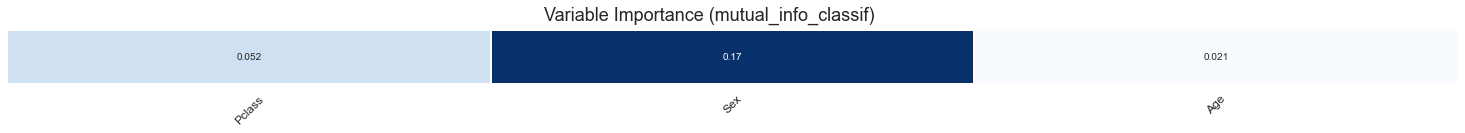

In [142]:
mutual_information = mutual_info_classif(x, y)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(x.columns, rotation=45, fontsize=12)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)
pass
s = pd.Series(mutual_information)
s.sort_values(ascending=True)

Vu qu'on a une base de données limité, on a juste 3 caracteristiques. Mais on peut voir que "Age" detient le plus faible score, donc on va enlever cette caracteristique pour l'exercice 6.

# QUESTION 6

- Entrainez les modèles de classification sur l'ensemble de données normalisées avec seulement les top caracteristiques selectionnés.

In [152]:
data = pd.read_csv('titanic.csv')
data.head()
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Fare','Age'],axis='columns',inplace=True)
data.Sex = data.Sex.map({'male': 0, 'female': 1})
x = data.drop('Survived',axis='columns')
y = data.Survived

In [153]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

##### Les arbres de décision

In [154]:
modelTree = tree.DecisionTreeClassifier(random_state=0, criterion='gini',max_depth=5 )
    #On commence par importer les bons modules et construire l’objet arbre
modelTree.fit(X_train,y_train)
    #L’arbre se construit à l’aide de la méthode .fit(X, y) 
accuracyTreeReel = modelTree.score(X_test,y_test) # Précision Arbre x_test
accuracyTreeTrain = modelTree.score(X_train,y_train) # Précision Arbre x_train

In [155]:
print('Précision Arbre x_test: ', accuracyTreeReel)
print('Précision Arbre x_train: ', accuracyTreeTrain)

Précision Arbre x_test:  0.7988826815642458
Précision Arbre x_train:  0.7837078651685393


In [156]:
pred = modelTree.predict(X_test)

In [157]:
matrix = pd.DataFrame(
        confusion_matrix(y_test, pred),
        columns=['Prédit 0', 'Prédit 1'],
        index=['Realité 0', 'Realité 1'])
matrix

,Prédit 0,Prédit 1
Realité 0,104,13
Realité 1,23,39


In [158]:
print(confusion_matrix(y_test, pred))

[[104  13]
 [ 23  39]]


In [159]:
y_pred=np.around(modelTree.predict(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       117
           1       0.75      0.63      0.68        62

    accuracy                           0.80       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.80      0.80      0.79       179



In [160]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
print (fpr)
print (tpr)

[0.         0.11111111 1.        ]
[0.         0.62903226 1.        ]


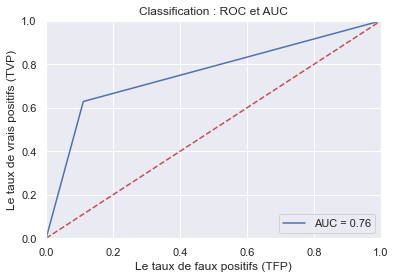

In [161]:
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Classification : ROC et AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Le taux de vrais positifs (TVP)')
plt.xlabel('Le taux de faux positifs (TFP)')
plt.show()

##### Random Forest

In [162]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [163]:
# Avec entropy
random_forest = RandomForestClassifier()
parameters = {'n_estimators': [3,4,5,10,15,20,25,30,35,40,45],'criterion': ['entropy'], 'max_depth': [2, 3, 5, 10]}
grid_obj = GridSearchCV(random_forest, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
print(grid_obj.best_estimator_)
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=4)
0.7794943820224719
0.8156424581005587


In [164]:
# Avec gini
random_forest = RandomForestClassifier()
parameters = {'n_estimators': [3,4,5,10,15,20,25,30,35,40,45],'criterion': ['gini'], 'max_depth': [2, 3, 5, 10]}
grid_obj = GridSearchCV(random_forest, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
print(grid_obj.best_estimator_)
# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

RandomForestClassifier(max_depth=5, n_estimators=3)
0.7865168539325843
0.7877094972067039


In [165]:
pred = clf.predict(X_test)

matrix = pd.DataFrame(
        confusion_matrix(y_test, pred),
        columns=['Predicted 0', 'Predicted 1'],
        index=['Actual 0', 'Actual 1'])
matrix

,Predicted 0,Predicted 1
Actual 0,92,18
Actual 1,20,49


In [166]:
acc = accuracy_score(y_test, pred)
acc

0.7877094972067039

In [167]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [168]:
fpr, tpr, _ = roc_curve(y_test, pred)
print (fpr)
print (tpr)

[0.         0.16363636 1.        ]
[0.         0.71014493 1.        ]


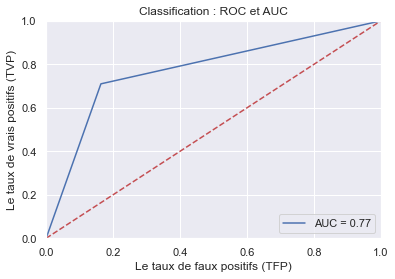

In [169]:
roc_auc = metrics.auc(fpr, tpr)
plt.title('Classification : ROC et AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Le taux de vrais positifs (TVP)')
plt.xlabel('Le taux de faux positifs (TFP)')
plt.show()

##### Classification bayésienne naïve

In [170]:
classificateur = GaussianNB()
classificateur.fit(X_train, y_train)

GaussianNB()

In [171]:
pred = classificateur.predict(X_test)

In [172]:
acc = accuracy_score(y_test, pred)
acc

0.7877094972067039

In [173]:
# On va creer la matrice de confusion
matrix = pd.DataFrame(
        confusion_matrix(y_test, pred),
        columns=['Predicted 0', 'Predicted 1'],
        index=['Actual 0', 'Actual 1'])
matrix

,Predicted 0,Predicted 1
Actual 0,92,18
Actual 1,20,49


In [174]:
# On va créer un rapport de classement
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [175]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, pred)
print (fpr) #taux de faux positifs (FPR)
print (tpr) #taux de vrais positifs (TPR)

[0.         0.16363636 1.        ]
[0.         0.71014493 1.        ]


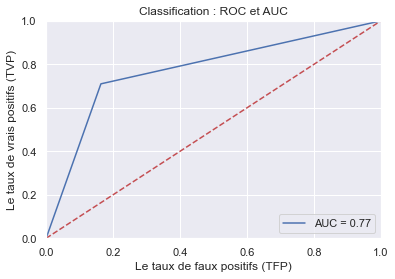

In [176]:
roc_auc = metrics.auc(fpr, tpr)
plt.title('Classification : ROC et AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Le taux de vrais positifs (TVP)')
plt.xlabel('Le taux de faux positifs (TFP)')
plt.show()

##### Bagging

In [177]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, oob_score=False, bootstrap=True, random_state=42)
bag_clf = bag_clf.fit(X_train, y_train)

In [178]:
Y_pred_bag_clf = bag_clf.predict(X_test)

In [179]:
fpr, tpr, _ = roc_curve(y_test, Y_pred_bag_clf)
print (fpr)
print (tpr)

[0.         0.16363636 1.        ]
[0.         0.71014493 1.        ]


In [180]:
# On mesurer la précision du modèle
acc = accuracy_score(y_test, Y_pred_bag_clf)
acc

0.7877094972067039

In [181]:
# On va creer la matrice de confusion
matrix = pd.DataFrame(
        confusion_matrix(y_test, Y_pred_bag_clf),
        columns=['Predicted 0', 'Predicted 1'],
        index=['Actual 0', 'Actual 1'])
matrix

,Predicted 0,Predicted 1
Actual 0,92,18
Actual 1,20,49


In [182]:
# On va créer un rapport de classement
print(classification_report(y_test,Y_pred_bag_clf))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



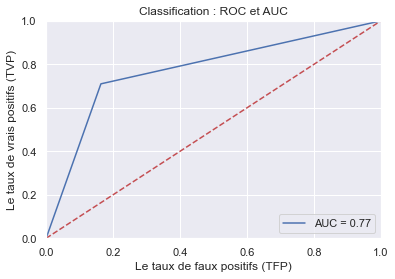

In [184]:
roc_auc = metrics.auc(fpr, tpr)
plt.title('Classification : ROC et AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Le taux de vrais positifs (TVP)')
plt.xlabel('Le taux de faux positifs (TFP)')
plt.show()

#### AdaBoost

In [185]:
from sklearn.ensemble import AdaBoostClassifier #utilisé pour instancier le Adaboost
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(X_train, y_train)
Y_train_abc = model.predict(X_train)

In [186]:
Y_pred_abc = model.predict(X_test)

In [187]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, Y_pred_abc)
print (fpr)
print (tpr)

[0.         0.16363636 1.        ]
[0.         0.71014493 1.        ]


In [188]:
# On mesurer la précision du modèle
acc = accuracy_score(y_test, Y_pred_abc)
acc

0.7877094972067039

In [189]:
# On va creer la matrice de confusion
matrix = pd.DataFrame(
        confusion_matrix(y_test, Y_pred_abc),
        columns=['Predicted 0', 'Predicted 1'],
        index=['Actual 0', 'Actual 1'])
matrix

,Predicted 0,Predicted 1
Actual 0,92,18
Actual 1,20,49


In [190]:
# On va créer un rapport de classement
print(classification_report(y_test,Y_pred_abc))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



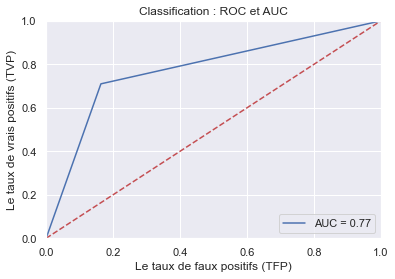

In [191]:
roc_auc = metrics.auc(fpr, tpr)
plt.title('Classification : ROC et AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Le taux de vrais positifs (TVP)')
plt.xlabel('Le taux de faux positifs (TFP)')
plt.show()